In [38]:
import numpy as np
import matplotlib.pyplot as plt
# Enable LaTeX
plt.rcParams['text.usetex'] = True  # Requires an external LaTeX installation

In [39]:
def nu(d,g,gammaup,gammadown):
    return 2*g**2/d*(gammaup-gammadown)/(gammaup+gammadown)**2

In [40]:
def accuracy(d,g,gammaup,gammadown):
    return d*(gammaup-gammadown)/(gammaup+gammadown)

In [41]:
def entropy(d,gammaup,gammadown):
    return d/2*(np.log(1+(gammaup-gammadown)/(gammaup+gammadown))-np.log(1-(gammaup-gammadown)/(gammaup+gammadown)))

In [42]:
g=0.1
gammadown=1
gammaup=np.linspace(1,100,1000)

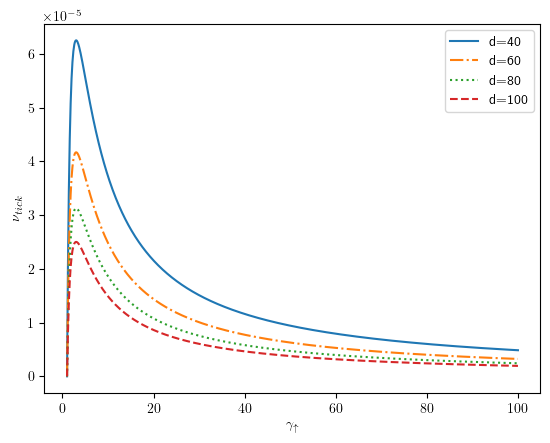

In [43]:
d=40
precision=[nu(d,g,i,gammadown) for i in gammaup]
plt.plot(gammaup,precision,label="d=40")
d=60
precision=[nu(d,g,i,gammadown) for i in gammaup]
plt.plot(gammaup,precision,label="d=60",linestyle="dashdot")
d=80
precision=[nu(d,g,i,gammadown) for i in gammaup]
plt.plot(gammaup,precision,label="d=80",linestyle="dotted")
d=100
precision=[nu(d,g,i,gammadown) for i in gammaup]
plt.plot(gammaup,precision,label="d=100",linestyle='dashed')
plt.ylabel(r"$\nu_{tick}$")
plt.xlabel(r"$\gamma_{\uparrow}$")
plt.legend()
plt.show()

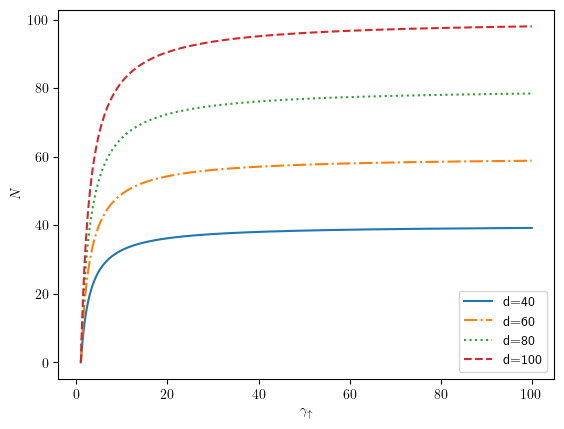

In [44]:
d=40
accuracy_list=[accuracy(d,g,i,gammadown) for i in gammaup]
plt.plot(gammaup,accuracy_list,label="d=40")
d=60
accuracy_list=[accuracy(d,g,i,gammadown) for i in gammaup]
plt.plot(gammaup,accuracy_list,label="d=60",linestyle="dashdot")
d=80
accuracy_list=[accuracy(d,g,i,gammadown) for i in gammaup]
plt.plot(gammaup,accuracy_list,label="d=80",linestyle="dotted")
d=100
accuracy_list=[accuracy(d,g,i,gammadown) for i in gammaup]
plt.plot(gammaup,accuracy_list,label="d=100",linestyle='dashed')
plt.ylabel(r"$N$")
plt.xlabel(r"$\gamma_{\uparrow}$")
plt.legend()
plt.show()

[]

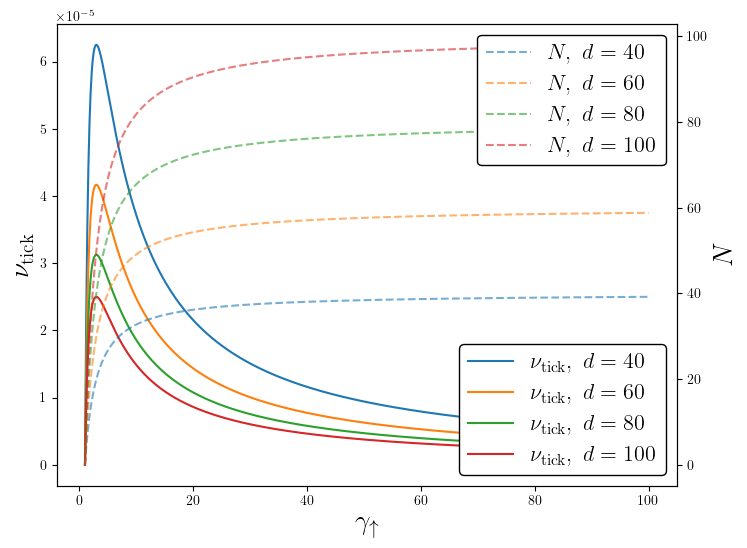

In [53]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 6))

linestyles_nu = [None, None, None, None]
linestyles_N = ['dashed', 'dashed', 'dashed', 'dashed']
d_list = [40, 60, 80, 100]

# Plot on ax1
for d, ls in zip(d_list, linestyles_nu):
    precision = [nu(d, g, i, gammadown) for i in gammaup]
    ax1.plot(gammaup, precision, label=fr"$\nu_{{\mathrm{{tick}}}},\ d={d}$", linestyle=ls, zorder=1)
ax1.set_ylabel(r"$\nu_{\mathrm{tick}}$", fontsize=20)
ax1.tick_params(axis='y')

# Plot on ax2
ax2 = ax1.twinx()
for d, ls in zip(d_list, linestyles_N):
    accuracy_list = [accuracy(d, g, i, gammadown) for i in gammaup]
    ax2.plot(gammaup, accuracy_list, label=fr"$N,\ d={d}$", linestyle=ls, alpha=0.6, zorder=1)
ax2.set_ylabel(r"$N$", fontsize=20)
ax2.tick_params(axis='y')

# Shared x-axis
ax1.set_xlabel(r"$\gamma_{\uparrow}$", fontsize=20)

# Linee su ax1 e ax2
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Legenda per ax1
legend1 = ax1.legend(lines1, labels1,
                     loc='lower right',  # scegli posizione a piacere
                     fontsize=16,
                     frameon=True,
                     edgecolor='black',
                     framealpha=1.0)
legend1.set_zorder(5)  # opzionale, sopra le linee

# Legenda per ax2
legend2 = ax2.legend(lines2, labels2,
                     loc='upper right',  # ad esempio: copre linee di ax2
                     fontsize=16,
                     frameon=True,
                     edgecolor='black',
                     framealpha=1.0)
legend2.set_zorder(10)  # Importante: mettila sopra tutto

# Facoltativo ma utile:
legend2.set_clip_on(False)

# Avoid bbox_inches='tight' to prevent cropping
plt.plot()


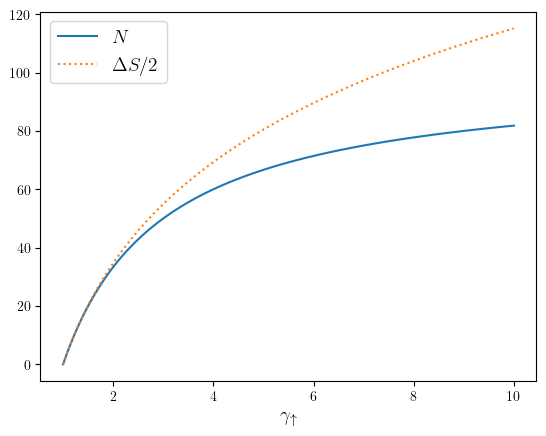

In [9]:
d=100
g=1
gammadown=1
gammaup=np.linspace(1,10,100)
entropy_list=[entropy(d,i,gammadown) for i in gammaup]
accuracy_list=[accuracy(d,g,i,gammadown) for i in gammaup]
plt.plot(gammaup,accuracy_list,label=r'$N$')
plt.plot(gammaup,entropy_list,label=r'$\Delta S/2$',linestyle="dotted")
plt.xlabel(r"$\gamma_{\uparrow}$",fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [10]:
def uminus(hf,J,kappa,e0):
    return (hf-np.sqrt(kappa**2*hf**2-(1-kappa**2)*(kappa**2*J**2-e0**2/16)))/(J*(1-kappa**2))

In [11]:
def cosdeltatheta(hf,hi,J,kappa,e0):
    return (4*(hf-J*uminus(hf,J,kappa,e0))*(hi-J*uminus(hf,J,kappa,e0))+4*kappa**2*J**2*(1-uminus(hf,J,kappa,e0)**2))/(e0/2*np.sqrt(e0**2/4-4*(hf-J*uminus(hf,J,kappa,e0))**2+4*(hi-J*uminus(hf,J,kappa,e0))**2))

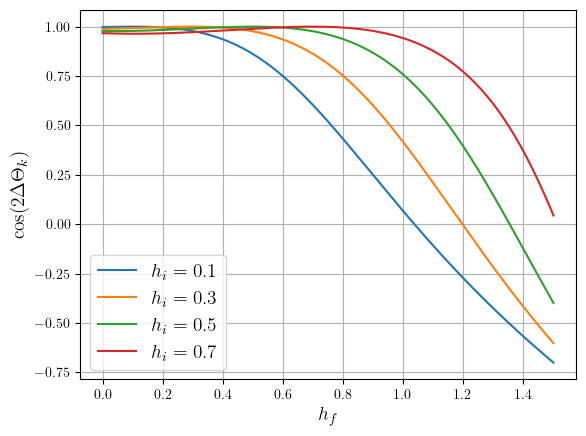

In [12]:
kappa=0.5
e0=3
J=1
hi=0.1
hf=np.linspace(0,1.5,1000)
condition=[cosdeltatheta(i,hi,J,kappa,e0) for i in hf]
plt.plot(hf,condition,label="$h_i=0.1$")
hi=0.3
condition=[cosdeltatheta(i,hi,J,kappa,e0) for i in hf]
plt.plot(hf,condition,label="$h_i=0.3$")
hi=0.5
condition=[cosdeltatheta(i,hi,J,kappa,e0) for i in hf]
plt.plot(hf,condition,label="$h_i=0.5$")
plt.xlabel("$h_f$",fontsize=14)
plt.ylabel("$\cos(2\Delta\Theta_k)$",fontsize=14)
hi=0.7
condition=[cosdeltatheta(i,hi,J,kappa,e0) for i in hf]
plt.plot(hf,condition,label="$h_i=0.7$")
plt.legend(fontsize=14)
plt.grid(True, which='both')
plt.show()

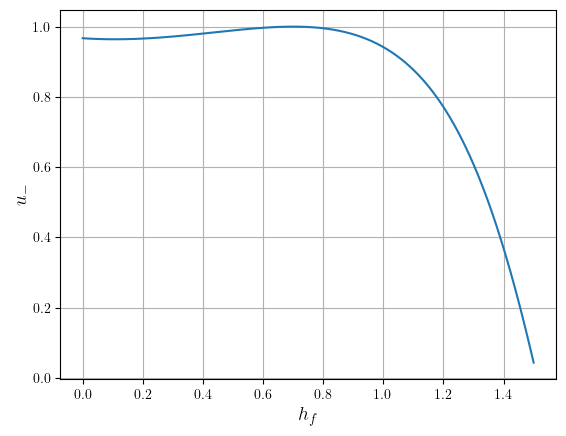

In [13]:
kappa=0.5
e0=3.
J=1.
hf=np.linspace(0,1.5,1000)
sol=[uminus(i,J,kappa,e0) for i in hf]
plt.plot(hf,condition)
plt.xlabel("$h_f$",fontsize=14)
plt.ylabel("$u_-$",fontsize=14)
plt.grid(True, which='both')
plt.show()

In [14]:
# XX model
def u(e0,Vf,t):
    return np.sqrt((e0**2-Vf**2/4)/(4*t**2))

In [15]:
def cosdeltatheta(e0,Vf,Vi,t):
    return e0**2/4-Vf**2+Vi*Vf

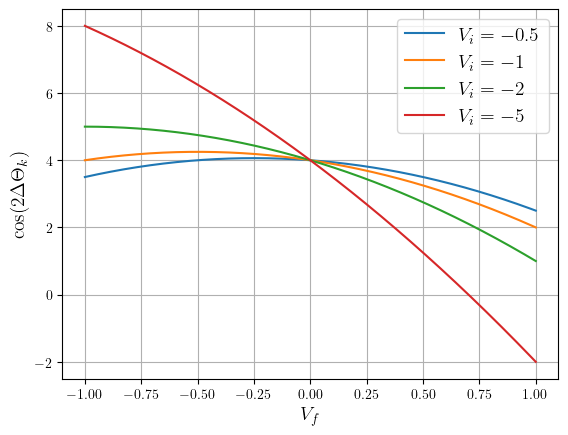

In [16]:
t=1
e0=4
Vf=np.linspace(-1,1,1000)
Vi=-0.5
condition=[cosdeltatheta(e0,i,Vi,t) for i in Vf]
plt.plot(Vf,condition,label="$V_i=-0.5$")
Vi=-1
condition=[cosdeltatheta(e0,i,Vi,t) for i in Vf]
plt.plot(Vf,condition,label="$V_i=-1$")
Vi=-2
condition=[cosdeltatheta(e0,i,Vi,t) for i in Vf]
plt.plot(Vf,condition,label="$V_i=-2$")
Vi=-5
condition=[cosdeltatheta(e0,i,Vi,t) for i in Vf]
plt.plot(Vf,condition,label="$V_i=-5$")
plt.xlabel("$V_f$",fontsize=14)
plt.ylabel("$\cos(2\Delta\Theta_k)$",fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, which='both')
plt.show()

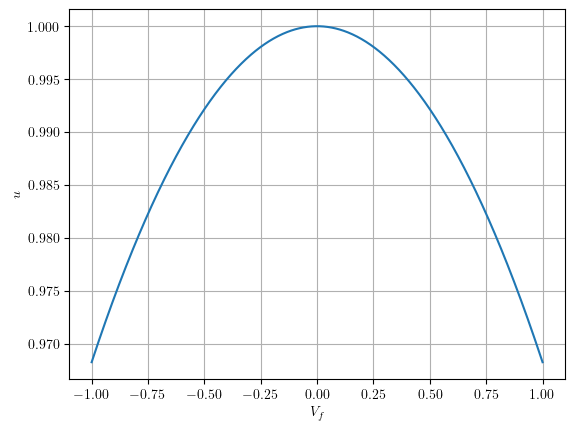

In [17]:
t=1
e0=2
Vf=np.linspace(-1,1,1000)
sol=[u(e0,i,t) for i in Vf]
plt.plot(Vf,sol)
plt.xlabel("$V_f$")
plt.ylabel("$u$")
plt.grid(True, which='both')
plt.show()

In [18]:
#Dimerized model
def w(gamma,delta,q):
    return -gamma*((1+delta)+(1-delta)*np.exp(-2*1j*q))
def z(delta,q):
    return -((1+delta)+(1-delta)*np.exp(-2*1j*q))
def wc(gamma,delta,q):
    return -gamma*((1+delta)+(1-delta)*np.exp(2*1j*q))
def zc(delta,q):
    return -((1+delta)+(1-delta)*np.exp(2*1j*q))
def omega1(gamma,delta,q):
    return 2*np.sqrt((1+gamma*delta)**2*np.cos(q)**2+(delta+gamma)**2*np.sin(q)**2)
def omega2(gamma,delta,q):
    return 2*np.sqrt((1-gamma*delta)**2*np.cos(q)**2+(delta-gamma)**2*np.sin(q)**2)

In [19]:
def plusMminus(gamma,delta,q):
    return (np.abs(1-(w(gamma,delta,q)-z(delta,q))*(wc(gamma,delta,q)+zc(delta,q))/(omega1(gamma,delta,q)*omega2(gamma,delta,q))))**2
def plusMplus(gamma,delta,q):
    return (np.abs(1+(w(gamma,delta,q)-z(delta,q))*(wc(gamma,delta,q)+zc(delta,q))/(omega1(gamma,delta,q)*omega2(gamma,delta,q))))**2

In [20]:
def p1plus(gamma,deltai,deltaf,q):
    return 1/2*np.real((1+((w(gamma,deltai,q)+z(deltai,q))*(wc(gamma,deltaf,q)+zc(deltaf,q))+(w(gamma,deltaf,q)+z(deltaf,q))*(wc(gamma,deltai,q)+zc(deltai,q)))/(omega1(gamma,deltai,q)*omega1(gamma,deltaf,q))))
def p2plus(gamma,deltai,deltaf,q):
    return 1/2*np.real((1+((w(gamma,deltai,q)-z(deltai,q))*(wc(gamma,deltaf,q)-zc(deltaf,q))+(w(gamma,deltaf,q)-z(deltaf,q))*(wc(gamma,deltai,q)-zc(deltai,q)))/(omega2(gamma,deltai,q)*omega2(gamma,deltaf,q))))
def p1minus(gamma,deltai,deltaf,q):
    return 1/2*np.real((1-((w(gamma,deltai,q)+z(deltai,q))*(wc(gamma,deltaf,q)+zc(deltaf,q))+(w(gamma,deltaf,q)+z(deltaf,q))*(wc(gamma,deltai,q)+zc(deltai,q)))/(omega1(gamma,deltai,q)*omega1(gamma,deltaf,q))))
def p2minus(gamma,deltai,deltaf,q):
    return 1/2*np.real((1-((w(gamma,deltai,q)-z(deltai,q))*(wc(gamma,deltaf,q)-zc(deltaf,q))+(w(gamma,deltaf,q)-z(deltaf,q))*(wc(gamma,deltai,q)-zc(deltai,q)))/(omega2(gamma,deltai,q)*omega2(gamma,deltaf,q))))

In [21]:
def condition(gamma,deltai,deltaf,q):
    return np.real((p1plus(gamma,deltai,deltaf,q)+p2plus(gamma,deltai,deltaf,q)-p1minus(gamma,deltai,deltaf,q)-p2minus(gamma,deltai,deltaf,q))*plusMminus(gamma,deltaf,q)+(p1plus(gamma,deltai,deltaf,q)-p2plus(gamma,deltai,deltaf,q)-p1minus(gamma,deltai,deltaf,q)+p2minus(gamma,deltai,deltaf,q))*plusMplus(gamma,deltaf,q))

In [22]:
def conditionxx(gamma,deltai,deltaf,q):
    return 1/2*((w(gamma,deltai,q)+z(deltai,q))*(wc(gamma,deltaf,q)+zc(deltaf,q))+(w(gamma,deltaf,q)+z(deltaf,q))*(wc(gamma,deltai,q)+zc(deltai,q)))/(omega1(gamma,deltai,q)*omega1(gamma,deltaf,q))

In [23]:
def solution(e0,gamma,deltaf):
    return np.real(np.arccos(np.sqrt((e0**2-16*gamma**2)*(e0**2-16*deltaf**2)/(16*e0**2))))

C:\Users\Daniele\AppData\Local\Temp\ipykernel_20448\1893717721.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.real(np.arccos(np.sqrt((e0**2-16*gamma**2)*(e0**2-16*deltaf**2)/(16*e0**2))))
C:\Users\Daniele\AppData\Local\Temp\ipykernel_20448\377555742.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return 1/2*((w(gamma,deltai,q)+z(deltai,q))*(wc(gamma,deltaf,q)+zc(deltaf,q))+(w(gamma,deltaf,q)+z(deltaf,q))*(wc(gamma,deltai,q)+zc(deltai,q)))/(omega1(gamma,deltai,q)*omega1(gamma,deltaf,q))
C:\Users\Daniele\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


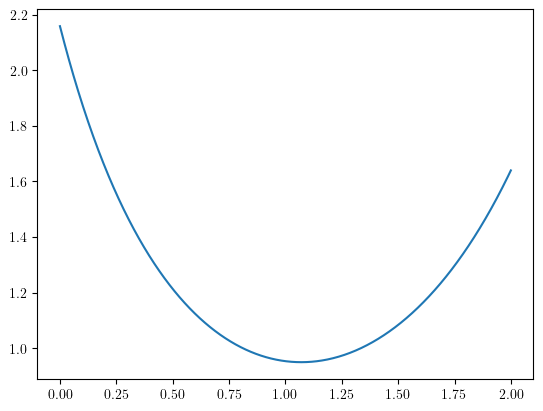

In [24]:
gamma=1.75
e0=8
deltaf=np.linspace(0,2.5,1000)
deltai=1.2
conditionarray=[conditionxx(gamma,deltai,i,solution(e0,gamma,i)) for i in deltaf]
plt.plot(deltaf,conditionarray,label="$delta_f=0$")
plt.show()